In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
inventory_data = pd.read_csv('Inventory Dataset.csv')
new_inventory_data = pd.read_csv('New Inventory.csv')

In [106]:
# Convert dictionaries to DataFrames
inventory_df = pd.DataFrame(inventory_data)
new_inventory_df = pd.DataFrame(new_inventory_data)

In [107]:
# Convert the 'Date' and 'Inventory Receive date' columns to datetime
inventory_df['Date'] = pd.to_datetime(inventory_df['Date'], format='%d-%m-%Y')
new_inventory_df['Inventory Receive'] = pd.to_datetime(new_inventory_df['Inventory Receive'], format='%d-%m-%Y')

In [108]:
# Merge both datasets on 'Item Number'
merged_df = pd.merge(inventory_df, new_inventory_df, how='outer', on='Item Number')

In [109]:
# Fill NaN values in 'Date' column with 'Inventory Receive date'
merged_df['Date'].fillna(merged_df['Inventory Receive'], inplace=True)

In [110]:
# Pivot the table to get the desired format
pivot_table = merged_df.pivot_table(index='Item Number', columns='Date', values='Inventory', fill_value=0)

In [111]:
# Resample the table to get weekly inventory levels
weekly_inventory = pivot_table.resample('W-Mon', axis=1).sum()

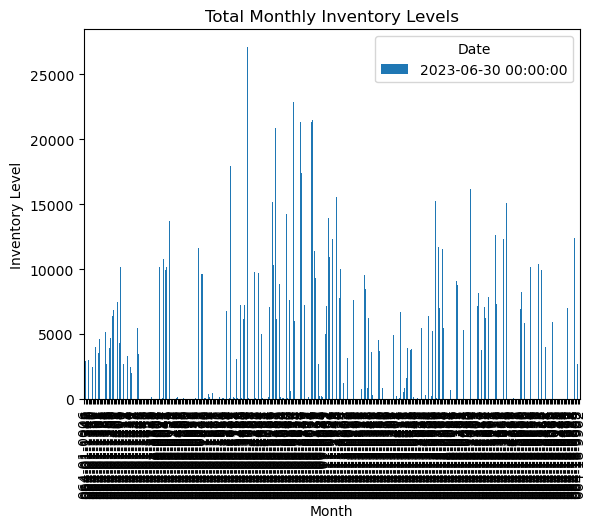

In [112]:
# Plotting the bar chart for total monthly inventory levels
monthly_inventory = pivot_table.resample('M', axis=1).sum()
monthly_inventory.plot(kind='bar', stacked=True)
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Inventory Level')
plt.show()

In [113]:
# Display the weekly inventory table
print(weekly_inventory)

Date         2023-06-19
Item Number            
064-01-0006          10
064-01-1346        2954
064-01-1347        3561
064-01-1348        3028
064-01-1349        2036
...                 ...
064-18-9878           2
064-18-9884       12419
064-18-9909          12
064-18-9938        2736
064-18-9962          19

[356 rows x 1 columns]


In [114]:
df = pd.DataFrame(inventory_data, new_inventory_data)

In [115]:
df_melted = pd.melt(df, id_vars='Item Number', var_name='Date', value_name='Inventory Level')

In [116]:
df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce', dayfirst=True)

In [117]:
df_melted = df_melted.dropna(subset=['Date', 'Inventory Level'])

In [118]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Date', y='Inventory Level', hue='Item Number', data=df_melted, palette='viridis')
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Inventory Level')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>